In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df_mixup = pd.read_csv("../data/cifar_100_resnet_mixup_2023_04_21-02_10_03_PM.csv", header=None)
df_base = pd.read_csv("../data/resnet18_cifar_100_2023_04_16-02_01_02_PM.csv", header=None)

In [3]:
def func(df):
    index = []
    for i, row in df.iterrows():
        arr_row = row.to_numpy()
        arr_row = [int(re.findall(r'\d+',str(x))[0]) for x in arr_row]
        target = arr_row[0]
        for idx, i in enumerate(reversed(arr_row[1:])):
            if target == i:
                continue
            elif target != i and idx == 0:
                index.append(300)
                break
            elif target != i:
                index.append(len(arr_row)-idx-1)
                break
    return index

In [4]:
df_base_converted = func(df_base)
df_mixup_converted = func(df_mixup)

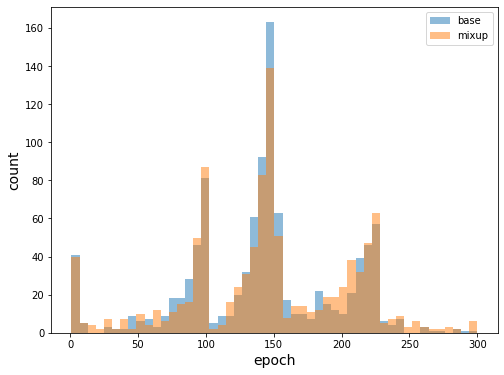

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df_base_converted, bins=50, alpha=0.5, label="base")
plt.hist(df_mixup_converted, bins=50, alpha=0.5, label="mixup")

plt.xlabel("epoch", size=14)
plt.ylabel("count", size=14)
plt.legend(loc='upper right')
plt.savefig("cifar100-eh.png")

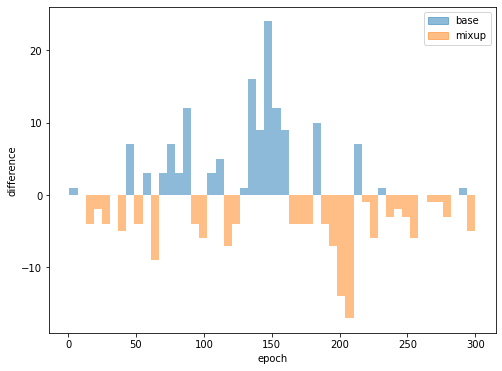

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_base_converted and df_mixup_converted are NumPy arrays or Pandas Series

# Calculate the histograms for the two datasets
hist_base, bins_base = np.histogram(df_base_converted, bins=50)
hist_mixup, bins_mixup = np.histogram(df_mixup_converted, bins=50)

# Calculate the bin centers for the histograms
bin_centers_base = (bins_base[:-1] + bins_base[1:]) / 2
bin_centers_mixup = (bins_mixup[:-1] + bins_mixup[1:]) / 2

# Calculate the difference between the two histograms
hist_difference = hist_base - hist_mixup

# Create a new figure for the difference plot
plt.figure(figsize=(8, 6))

# Set the color of each bar based on its sign (positive or negative)
bar_colors = ['tab:blue' if val >= 0 else 'tab:orange' for val in hist_difference]

# Plot the difference histogram with the colored bars
plt.bar(bin_centers_base, hist_difference, width=(bins_base[1] - bins_base[0]), color=bar_colors, alpha=0.5)

# Optionally, you can add labels, titles, and legends
plt.xlabel("epoch")
plt.ylabel("difference")
import matplotlib.patches as mpatches

# Create legend patches for red and blue colors
red_patch = mpatches.Patch(color='tab:blue', label='base', alpha=0.5)
blue_patch = mpatches.Patch(color='tab:orange', label='mixup', alpha=0.5)

# Add the legend with the custom patches
plt.legend(handles=[red_patch, blue_patch])

# Display the plot
plt.savefig("cifar100-eh-diff.png")
plt.show()


In [103]:
df_base_phases = []
for i in df_base_converted:
    if (i >= 0) and (i <= 100):
        df_base_phases.append(1)
    elif (i > 100) and (i <= 150):
        df_base_phases.append(2)
    elif (i > 150) and (i <= 225):
        df_base_phases.append(3)
    elif (i > 225) and (i < 300):
        df_base_phases.append(4)

df_mixup_phases = []
for i in df_mixup_converted:
    if (i >= 0) and (i <= 100):
        df_mixup_phases.append(1)
    elif (i > 100) and (i <= 150):
        df_mixup_phases.append(2)
    elif (i > 150) and (i <= 225):
        df_mixup_phases.append(3)
    elif (i > 225) and (i < 300):
        df_mixup_phases.append(4)

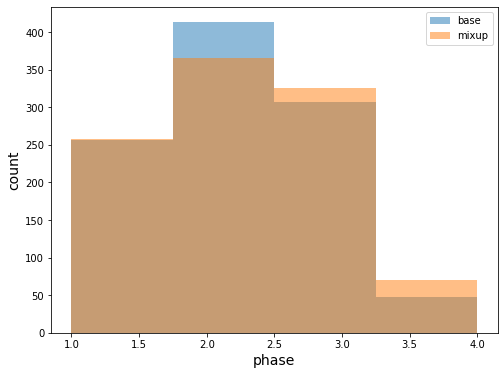

In [110]:
plt.figure(figsize=(8,6))
plt.hist(df_base_phases, bins=4, alpha=0.5, label="base")
plt.hist(df_mixup_phases, bins=4, alpha=0.5, label="mixup")

plt.xlabel("phase", size=14)
plt.ylabel("count", size=14)
plt.legend(loc='upper right')
plt.savefig("cifar100-eh-ph.png")

In [105]:
print("base phase 1:", df_base_phases.count(1))
print("mixup phase 1:", df_mixup_phases.count(1))

print("base phase 2:", df_base_phases.count(2))
print("mixup phase 2:", df_mixup_phases.count(2))

print("base phase 3:", df_base_phases.count(3))
print("mixup phase 3:", df_mixup_phases.count(3))

print("base phase 4:", df_base_phases.count(4))
print("mixup phase 4:", df_mixup_phases.count(4))

base phase 1: 256
mixup phase 1: 258
base phase 2: 413
mixup phase 2: 366
base phase 3: 307
mixup phase 3: 326
base phase 4: 47
mixup phase 4: 70


In [106]:
df_base_phases_pre = []
for i in df_base_converted:
    if (i >= 0) and (i <= 40):
        df_base_phases_pre.append(1)

df_mixup_phases_pre = []
for i in df_mixup_converted:
    if (i >= 0) and (i <= 40):
        df_mixup_phases_pre.append(1)

In [107]:
print("base phase 1:", df_base_phases_pre.count(1))
print("mixup phase 1:", df_mixup_phases_pre.count(1))

base phase 1: 52
mixup phase 1: 65


In [108]:
print((65*100)/52 - 100)

25.0
